In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.feature import greycomatrix, greycoprops
from skimage import io
import skimage

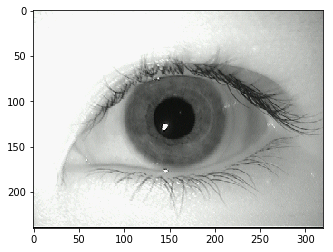

In [2]:
fp1 = io.imread("dbIR/aeval1.bmp")
plt.imshow(fp1, cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255)
plt.show()

## Foreground features

In [3]:
PATCH_SIZE = 21
fgPatch = []

for line in open("dbIR/iris_foreground.txt"):
    #print(len(line))
    
    if(len(line) != 1):

        if(".bmp" in line):
            irisImage_filePath = "dbIR/" + line[:-1]
            print(irisImage_filePath)
            imageIris = io.imread(irisImage_filePath, as_gray = True)
            imageIris = skimage.img_as_ubyte(imageIris)
            fg_locations = []
            
        
        else:
            locs = line.split()
            #print(locs)
            
            for elem in locs:
                iLoc = elem
                #print(elem)
                
                iLoc = iLoc.split(",")
                #print(iLoc)
                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]
                
                pair = tuple([int(rLoc), int(cLoc)])
                #print(pair)
                #print(type(pair))
                
                fg_locations.append(pair)
                
            print(fg_locations)
            
            for loc in fg_locations:
                patch = imageIris[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]
                
                print("loc::::::::::::::::::::::::::::::::::::::")
                print(loc)
                print("patch::::::::::::::::::::::::::::::::::::")
                print(patch)
                
                fgPatch.append(patch)
        

dbIR/aeval1.bmp
[(108, 144), (121, 142), (111, 151), (123, 151), (118, 156)]
loc::::::::::::::::::::::::::::::::::::::
(108, 144)
patch::::::::::::::::::::::::::::::::::::
[[ 16  16  16  19  16  15  16  16  16  19  14  15  16  16  19  16  16  19
   16  16  21]
 [ 16  16  16  19  16  16  18  16  16  16  19  16  19  16  16  19  18  19
   16  19  16]
 [ 19  16  19  18  19  14  16  19  18  19  16  19  16  19  16  16  19  19
   21  22  16]
 [ 16  19  16  15  19  15  16  19  16  16  14  15  16  16  16  19  16  21
   35  24  19]
 [ 19  18  19  19  19  16  19  15  19  15  21  16  19  16  15  19  11  37
   70  23  16]
 [ 16  19  18  19  19  16  19  16  19  16  21  19  15  16  19  16  19  24
   40  27  16]
 [ 16  19  21  16  19  19  16  19  16  19  15  19  16  16  16  19  19  18
   19  19  16]
 [ 19  19  16  19  21  19  19  17  21  19  16  19  16  19  16  19  19  16
   21  19  19]
 [ 19  19  16  19  21  19  16  19  21  19  16  19  16  16  19  16  16  19
   18  19  14]
 [ 19  19  21  22  18  22  

/home/ubuntu/miniconda3/envs/vcdl/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


[(91, 146), (104, 138), (110, 142), (100, 152), (109, 145)]
loc::::::::::::::::::::::::::::::::::::::
(91, 146)
patch::::::::::::::::::::::::::::::::::::
[[ 21  19  19  19  21  16  19  19  16  21  19  19  16  19  21  19  16  22
   21  24  22]
 [ 19  21  19  19  16  21  19  16  19  21  19  19  16  19  21  16  19  19
   19  18  19]
 [ 19  19  16  19  19  16  21  16  19  19  19  18  19  16  19  16  19  19
   19  18  19]
 [ 21  19  16  16  19  16  19  19  21  19  16  19  21  19  19  16  19  21
   16  19  19]
 [ 21  19  19  16  21  19  19  16  19  21  16  19  19  21  16  19  19  16
   21  19  19]
 [ 19  16  19  19  19  16  21  19  19  16  19  18  22  16  19  19  18  19
   19  16  19]
 [ 18  19  19  21  19  19  21  19  19  16  19  21  19  19  19  21  19  16
   19  19  19]
 [ 21  16  19  21  19  16  19  19  21  19  19  23  24  19  21  19  19  19
   18  19  16]
 [ 21  16  19  19  19  21  19  19  21  19  24  24  27  27  16  21  19  19
   16  21  19]
 [ 19  16  21  19  19  19  18  22  21  22  27

[(112, 204), (121, 208), (121, 202), (128, 211), (128, 203)]
loc::::::::::::::::::::::::::::::::::::::
(112, 204)
patch::::::::::::::::::::::::::::::::::::
[[ 23  19  24  29  19  19  19  16  21  19  19  23  19  16  21  19  19  21
   16  19  19]
 [ 19  19  29  30  19  21  16  19  21  19  19  23  21  19  19  19  18  19
   19  21  19]
 [ 19  21  19  19  21  19  21  19  16  19  21  22  24  23  17  19  19  21
   16  22  17]
 [ 19  19  21  19  19  18  19  19  19  21  19  23  24  22  21  19  19  21
   19  24  19]
 [ 19  24  19  19  18  19  19  21  19  22  21  19  23  19  18  19  22  24
   16  23  16]
 [ 22  18  19  22  21  19  21  19  19  21  22  24  23  19  21  19  19  23
   19  21  16]
 [ 21  23  22  21  19  24  19  21  23  22  24  24  23  19  23  24  24  19
   19  21  19]
 [ 24  23  19  23  21  22  24  22  21  24  24  24  23  25  21  23  22  21
   19  17  21]
 [ 23  21  22  23  24  19  24  24  23  22  27  26  27  27  23  27  21  19
   21  19  19]
 [ 23  24  24  19  24  24  21  22  23  27  

[(111, 123), (131, 127), (105, 198), (132, 196), (149, 179)]
loc::::::::::::::::::::::::::::::::::::::
(111, 123)
patch::::::::::::::::::::::::::::::::::::
[[ 96  99  99  96 102 101 104 106 107 107 104 107 104  89  88  85  78  79
   75  71  59]
 [ 99 104 105 109 102 101  99  99 101 107 107 107 103  96  83  88  78  72
   75  80  59]
 [ 94 103 104 107 104 107 101 102 101 107 107 107  99  96  87  83  80  75
   75  77  56]
 [101 107 104 106 104 107 102 101  94 101 102  96 103  91  87  86  85  83
   80  79  59]
 [107 104 111 107 104 103 102 103  99 103 104  99  99  91  88  87  83  83
   79  75  53]
 [ 99 104 103 107 110 109 107 112 107 107 101  99  99  96  88  86  85  78
   75  64  53]
 [102 109 106 107 104 107 102 109 107 107 103  99 104  96  94  85  86  79
   75  69  46]
 [102 104 104 102 104 107 104 107 117 105 109 104 102 104  93  86  85  86
   85  78  48]
 [ 94 104 103  99 101 107 107 110 112 109 110 111 104  94  96  88  83  87
   80  83  48]
 [101 102 104  99 107 101 107 102 109 107 1

[(114, 118), (136, 122), (111, 195), (136, 197), (155, 168)]
loc::::::::::::::::::::::::::::::::::::::
(114, 118)
patch::::::::::::::::::::::::::::::::::::
[[ 94  96 101  99  96  99  96 102  96 103  99  99 101  83  87  83  86  96
   93  86  79]
 [ 91  91  99  95  91  95  96  99  99  96 103  99  99  88  79  83  88  94
   93  88  83]
 [ 94  96  99  96  99  95  99  99  98  99  99  99 107  95  83  96  88  91
   99  91  85]
 [ 96  99  91  93  96  94  99  95  96  99 104 103  99  99  87  96  88  91
   94  91  85]
 [101  99  91  99 101  96 102 101 102  96  99 101  98  99  95  86  85  88
   83  91  71]
 [ 94  98  96  96  99  96  99 101  99  99  99  96 103  91  95  88  83  88
   79  78  77]
 [ 99  99 101  99  99  99 103  99 101 107  98  99  99  96  91  93  91  88
   86  85  64]
 [ 96  99  99  99 101  99  99 103 102 101  99  99  99  96  88  90  88  91
   83  80  72]
 [ 99 102 101  96  99  99 104 103  99 102 101  99  96  94  93  88  86  85
   86  71  51]
 [ 96  99 103  99  99 103 104  99  99  99  

In [4]:
len(fgPatch)

250

In [5]:
fgPatch

[array([[ 16,  16,  16,  19,  16,  15,  16,  16,  16,  19,  14,  15,  16,
          16,  19,  16,  16,  19,  16,  16,  21],
        [ 16,  16,  16,  19,  16,  16,  18,  16,  16,  16,  19,  16,  19,
          16,  16,  19,  18,  19,  16,  19,  16],
        [ 19,  16,  19,  18,  19,  14,  16,  19,  18,  19,  16,  19,  16,
          19,  16,  16,  19,  19,  21,  22,  16],
        [ 16,  19,  16,  15,  19,  15,  16,  19,  16,  16,  14,  15,  16,
          16,  16,  19,  16,  21,  35,  24,  19],
        [ 19,  18,  19,  19,  19,  16,  19,  15,  19,  15,  21,  16,  19,
          16,  15,  19,  11,  37,  70,  23,  16],
        [ 16,  19,  18,  19,  19,  16,  19,  16,  19,  16,  21,  19,  15,
          16,  19,  16,  19,  24,  40,  27,  16],
        [ 16,  19,  21,  16,  19,  19,  16,  19,  16,  19,  15,  19,  16,
          16,  16,  19,  19,  18,  19,  19,  16],
        [ 19,  19,  16,  19,  21,  19,  19,  17,  21,  19,  16,  19,  16,
          19,  16,  19,  19,  16,  21,  19,  19],
        

In [6]:
fg_f1 = []
fg_f2 = []
fg_f3 = []
fg_f4 = []
fg_f5 = []
fg_f6 = []

for patch in fgPatch:
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    fg_f1.append(greycoprops(glcm, 'contrast')[0, 0])
    fg_f2.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    fg_f3.append(greycoprops(glcm, 'homogeneity')[0, 0])
    fg_f4.append(greycoprops(glcm, 'energy')[0, 0])
    fg_f5.append(greycoprops(glcm, 'correlation')[0, 0])
    fg_f6.append(greycoprops(glcm, 'ASM')[0, 0])

In [7]:
import numpy as np

X_fg = np.concatenate([np.array(fg_f1).reshape(-1,1), 
                       np.array(fg_f2).reshape(-1,1), 
                       np.array(fg_f3).reshape(-1,1),
                       np.array(fg_f4).reshape(-1,1),
                       np.array(fg_f5).reshape(-1,1),
                       np.array(fg_f6).reshape(-1,1)], axis = 1)

In [8]:
X_fg.shape

(250, 6)

In [9]:
y_fg = np.array([1 for i in range(len(fg_f1))]).reshape(-1,1)
y_fg = y_fg.astype(dtype=np.int32)

In [10]:
y_fg.shape

(250, 1)

In [11]:
colLabels = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM']

## Background Features

In [12]:
PATCH_SIZE = 21
bgPatch = []

for line in open("dbIR/iris_background.txt"):
    #print(len(line))
    
    if(len(line) != 1):

        if(".bmp" in line):
            irisImage_filePath = "dbIR/" + line[:-1]
            print(irisImage_filePath)
            imageIris = io.imread(irisImage_filePath, as_gray = True)
            imageIris = skimage.img_as_ubyte(imageIris)
            bg_locations = []
            
        
        else:
            locs = line.split()
            #print(locs)
            
            for elem in locs:
                iLoc = elem
                #print(elem)
                
                iLoc = iLoc.split(",")
                #print(iLoc)
                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]
                
                pair = tuple([int(rLoc), int(cLoc)])
                #print(pair)
                #print(type(pair))
                
                bg_locations.append(pair)
                
            print(bg_locations)
            
            for loc in bg_locations:
                patch = imageIris[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]
                print("loc::::::::::::::::::::::::::::::::::::::")
                print(loc)
                print("patch::::::::::::::::::::::::::::::::::::")
                print(patch)
                
                bgPatch.append(patch)
        

dbIR/aeval1.bmp
[(118, 247), (74, 213), (120, 235), (115, 165), (91, 247)]
loc::::::::::::::::::::::::::::::::::::::
(118, 247)
patch::::::::::::::::::::::::::::::::::::
[[112 118 120 123 125 126 127 128 134 141 150 159 160 166 163 165 147 131
   80  96  67]
 [110 119 118 120 125 126 128 127 126 135 144 158 160 163 167 168 155 160
  123  79  83]
 [110 120 119 120 123 128 126 128 131 128 147 155 159 168 171 175 174 159
  166 135  91]
 [115 112 118 120 123 128 125 126 131 128 139 149 158 167 176 176 177 176
  159 174 120]
 [112 120 119 123 123 127 128 130 131 126 136 152 162 176 179 179 179 181
  171 163 171]
 [117 115 119 120 126 123 128 131 128 127 131 139 163 168 179 181 182 184
  174 171 165]
 [120 112 123 120 123 126 127 131 128 128 126 168 171 173 193 189 190 184
  176 171 171]
 [112 120 118 123 125 123 128 123 128 131 115 199 179 163 186 184 187 184
  182 175 171]
 [115 118 120 120 123 127 126 127 128 131 123 179 173 211 216 163 195 231
  179 176 171]
 [112 119 118 125 123 123 128

  248 248 248]]
loc::::::::::::::::::::::::::::::::::::::
(158, 41)
patch::::::::::::::::::::::::::::::::::::
[[232 232 234 227 224 230 232 230 229 231 227 238 235 231 246 235 229 230
  219 213 211]
 [230 231 232 230 232 230 229 230 231 230 231 235 240 235 246 229 230 226
  219 213 207]
 [232 231 232 230 232 235 235 231 227 229 230 237 235 230 216 219 215 219
  219 224 227]
 [237 232 230 231 230 237 235 235 230 232 231 235 235 231 222 221 211 208
  222 227 224]
 [231 230 232 234 235 235 232 235 229 225 223 219 216 215 224 227 224 230
  229 227 222]
 [230 237 227 235 234 235 232 232 227 222 221 219 214 215 219 227 229 227
  230 223 227]
 [239 238 239 243 243 232 230 229 222 223 224 230 237 246 240 238 235 232
  215 211 211]
 [240 238 240 239 238 235 232 219 223 219 224 227 240 246 247 243 235 224
  219 207 206]
 [246 235 247 243 235 227 232 226 238 240 247 238 232 226 216 222 221 219
  222 232 235]
 [240 239 243 240 238 232 230 232 238 247 246 246 229 230 221 219 216 214
  224 230 239]


[(122, 72), (52, 49), (44, 165), (72, 239), (205, 261)]
loc::::::::::::::::::::::::::::::::::::::
(122, 72)
patch::::::::::::::::::::::::::::::::::::
[[131  93 104 118  95 104 150 125 126 117 118 123 128 128 103 123 123  88
   88 110 149]
 [112 107 123 111  96 112 169 133 123 115 119 131 128 123 107 133  99  87
  102 127 149]
 [ 99 147 123  99 120 107  88 125 118 123 125 126 127 112 115 107  96 131
  115 127 123]
 [136 143  99 111 126  95 104 120 118 123 125 128 131  99 115  87 112 134
  117 126 107]
 [144 115 112 131 112  75 115 123 127 126 127 128 111  83  99 119 131 133
  118  88 107]
 [139 101 131 128  99  88 123 123 131 125 126 128  96  83 107 135 131 127
   96  83 127]
 [ 99 120 139 126  85 123 128 126 149 131 126 107  95 112 131 133 131 110
   93 115 147]
 [ 99 133 136 110  93 130 126 136 157 126 123  88 101 126 127 131 136  99
   91 136 144]
 [122 120 136  99 120 134 135 134 135 117 107  91 119 128 134 128 107 107
  115 133 142]
 [118 120 128  95 131 136 134 136 128 107 103  99

[(130, 140), (149, 70), (135, 224), (47, 264), (61, 21)]
loc::::::::::::::::::::::::::::::::::::::
(130, 140)
patch::::::::::::::::::::::::::::::::::::
[[ 24  29  22  21  23  22  24  23  24  24  23  22  24  24  21  24  27  24
   24  22  24]
 [ 29  24  23  22  24  24  23  24  24  19  24  24  22  24  24  24  23  24
   24  30  27]
 [ 27  24  24  23  27  19  27  24  23  24  24  27  24  24  22  24  24  27
   24  27  26]
 [ 24  24  23  27  24  24  27  23  22  24  24  27  24  23  24  24  27  22
   26  27  35]
 [ 24  24  27  22  24  27  24  29  22  29  30  29  27  24  27  24  24  27
   23  30  29]
 [ 27  24  27  26  27  27  27  26  30  29  30  29  27  27  24  27  24  24
   26  27  29]
 [ 27  29  27  27  24  27  32  31  35  35  37  43  27  32  29  27  23  27
   24  22  24]
 [ 27  27  29  24  27  32  35  35  40  45  43  40  27  38  29  27  24  27
   26  27  24]
 [ 32  24  27  32  30  32  43  37  51  43  32  69  43  35  37  27  27  24
   24  23  24]
 [ 30  25  29  30  29  35  40  35  55  72  86 1

[(118, 88), (117, 228), (168, 257), (25, 35), (168, 273)]
loc::::::::::::::::::::::::::::::::::::::
(118, 88)
patch::::::::::::::::::::::::::::::::::::
[[163 168 167 169 168 165 166 170 173 171 174 175 176 179 182 181 176 174
  179 176 181]
 [163 163 163 175 168 166 163 168 171 167 171 171 176 175 179 176 182 176
  176 175 174]
 [166 168 173 174 168 168 166 168 171 167 171 176 179 176 179 179 179 179
  175 179 179]
 [165 166 167 176 167 166 167 171 168 171 171 174 176 181 174 178 179 181
  179 179 179]
 [165 169 173 171 170 165 169 171 176 171 175 176 179 179 179 181 187 179
  182 181 179]
 [160 167 166 175 168 171 167 168 174 168 176 174 176 179 179 183 179 184
  179 179 181]
 [166 168 171 168 175 171 171 171 176 179 175 176 174 184 182 192 187 183
  187 184 187]
 [163 167 168 171 171 170 168 171 171 176 174 176 174 179 184 187 183 187
  184 187 183]
 [168 171 171 173 171 171 176 171 175 174 176 183 179 184 187 192 187 183
  187 187 186]
 [166 168 171 176 170 168 174 171 173 176 182 1

In [13]:
bg_f1 = []
bg_f2 = []
bg_f3 = []
bg_f4 = []
bg_f5 = []
bg_f6 = []

for patch in bgPatch:
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    bg_f1.append(greycoprops(glcm, 'contrast')[0, 0])
    bg_f2.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    bg_f3.append(greycoprops(glcm, 'homogeneity')[0, 0])
    bg_f4.append(greycoprops(glcm, 'energy')[0, 0])
    bg_f5.append(greycoprops(glcm, 'correlation')[0, 0])
    bg_f6.append(greycoprops(glcm, 'ASM')[0, 0])

In [14]:
X_bg = np.concatenate([np.array(bg_f1).reshape(-1,1), 
                       np.array(bg_f2).reshape(-1,1), 
                       np.array(bg_f3).reshape(-1,1),
                       np.array(bg_f4).reshape(-1,1),
                       np.array(bg_f5).reshape(-1,1),
                       np.array(bg_f6).reshape(-1,1)], axis = 1)

In [15]:
y_bg = np.array([0 for i in range(len(bg_f1))]).reshape(-1,1)
y_bg = y_bg.astype(dtype=np.int32)

In [16]:
X = np.concatenate([X_fg, X_bg])
X.shape

(500, 6)

In [17]:
y = np.concatenate([y_fg, y_bg])

In [18]:
y.shape

(500, 1)

In [19]:
import pandas as pd

irisData = pd.DataFrame(data=X, columns=colLabels)

In [20]:
irisLabel = pd.Series(data=y.ravel())

In [21]:
irisData['label'] = irisLabel

In [22]:
irisData.to_csv("iris.csv", index=False)